In [639]:
import pandas as pd

In [640]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [641]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [740]:
! pip install seaborn

In [643]:
 pip install regex

Note: you may need to restart the kernel to use updated packages.


In [644]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [645]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [646]:
pip install regex

Note: you may need to restart the kernel to use updated packages.


In [647]:
import re
re.compile('<title>(.*)</title>')

re.compile(r'<title>(.*)</title>', re.UNICODE)

In [648]:
import matplotlib.pyplot as plt

In [649]:
from matplotlib import rcParams

Figure(640x480)
AxesSubplot(0.125,0.11;0.775x0.77)


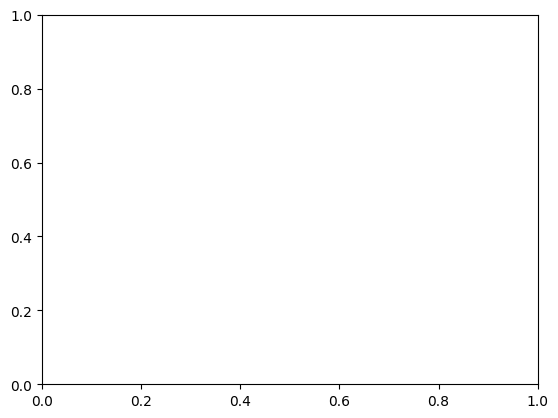

In [650]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

print(fig)
print(ax)

In [651]:
import missingno as msno

In [712]:
data = pd.read_csv("gender_submission.csv")
data = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
test_ids=test["PassengerId"]
df_train=pd.read_csv("train.csv")
df_test=pd.read_csv("test.csv")
df_gender=pd.read_csv("gender_submission.csv")


def clean(data):
    data=data.drop(["Ticket","Name", "PassengerId","Cabin"], axis=1)

    cols=["SibSp", "Parch", "Fare", "Age"]

    for col in cols:
        data[col].fillna(data[col].median(), inplace=True)
    data.Embarked.fillna("U", inplace=True)
    return data 
data = clean(data)
test = clean(test)


<AxesSubplot: >

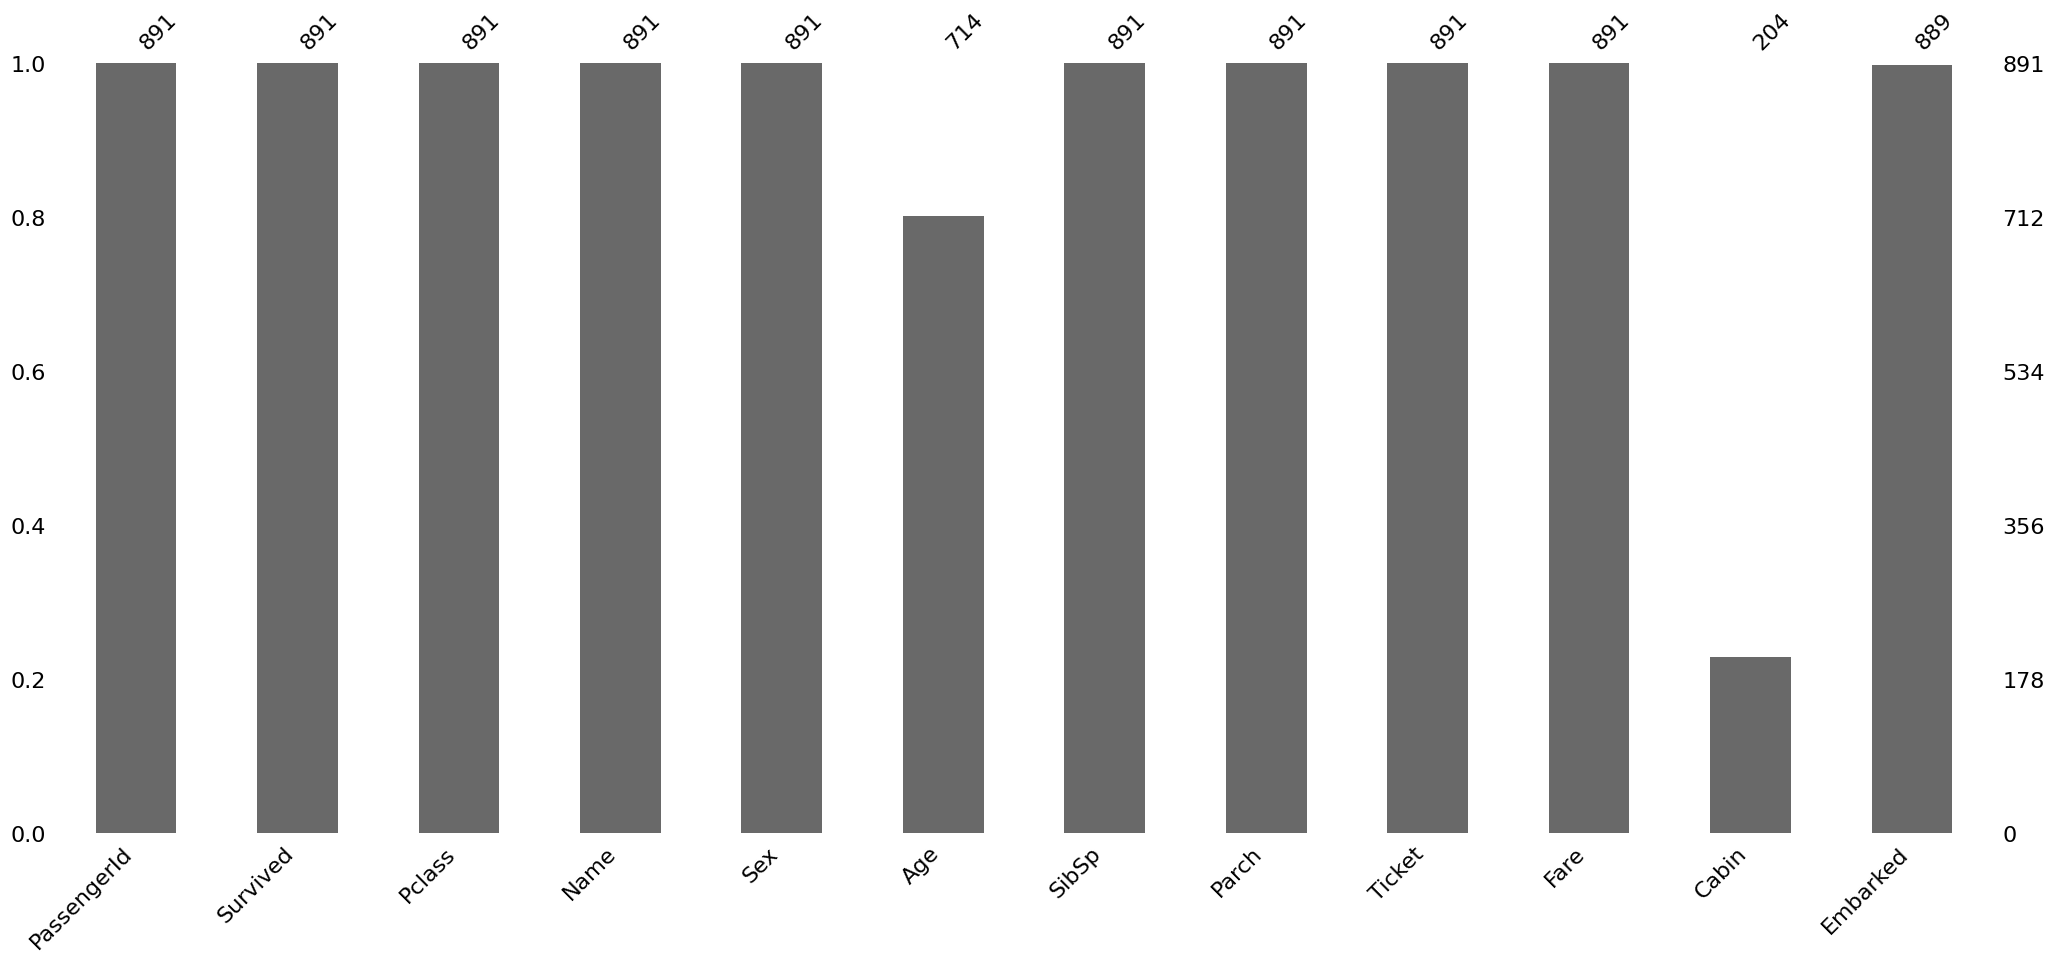

In [713]:
missing_data=pd.read_csv("gender_submission.csv"),pd.read_csv("train.csv"),pd.read_csv("test.csv")
msno.bar(df_train)

/tmp/ipykernel_17757/829344224.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), cmap="coolwarm")


<AxesSubplot: >

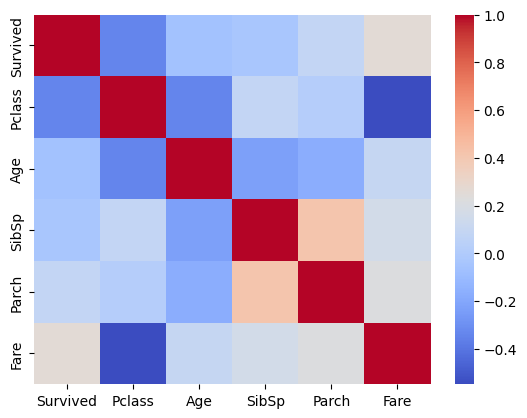

In [714]:
import seaborn as sns

sns.heatmap(data.corr(), cmap="coolwarm")


In [715]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [716]:
data["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

<AxesSubplot: xlabel='Sex', ylabel='count'>

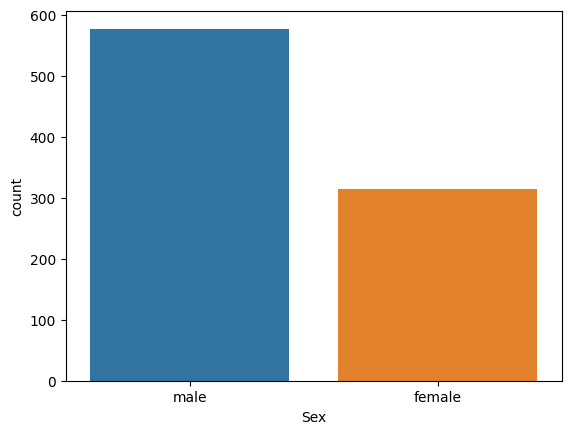

In [717]:
sns.countplot(data, x="Sex")

<AxesSubplot: xlabel='Survived', ylabel='count'>

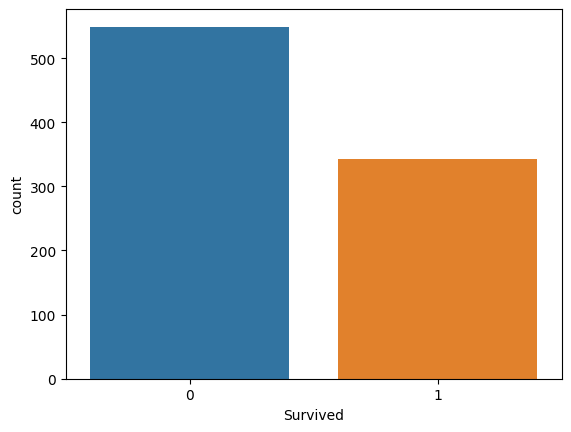

In [718]:
sns.countplot(data, x="Survived")

In [719]:
data["Survived"].value_counts()


0    549
1    342
Name: Survived, dtype: int64

In [720]:
data.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


<AxesSubplot: xlabel='Survived', ylabel='count'>

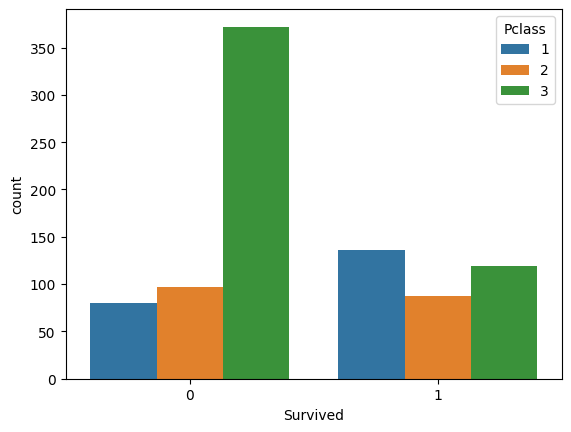

In [721]:
sns.countplot(data,x="Survived", hue="Pclass")

In [722]:
data["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

<AxesSubplot: xlabel='Survived', ylabel='count'>

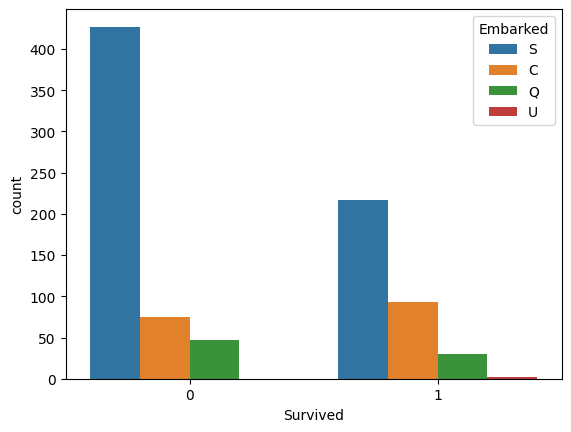

In [723]:
sns.countplot(data, x="Survived", hue="Embarked")


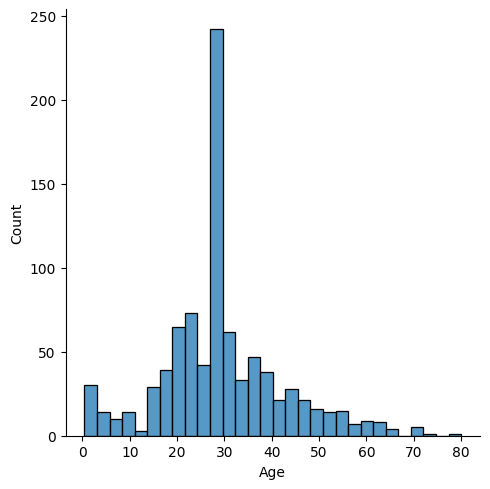

In [724]:
sns.displot(data["Age"])

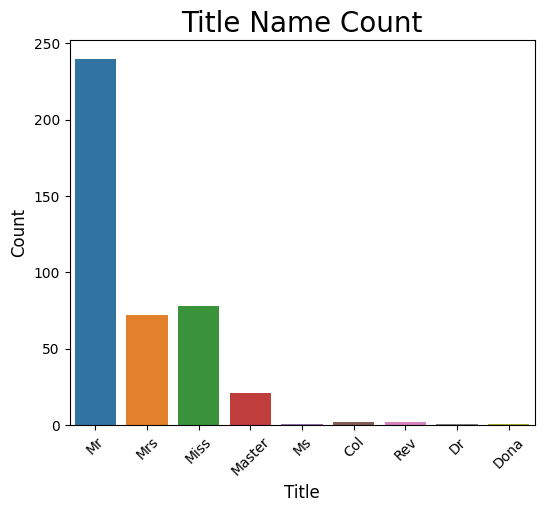

In [781]:
df_train["Title"]=df_test.Name.apply(lambda x: re.search(' ([A-Z][a-z]+)\.',x).group(1))
plt.figure(figsize=(6,5))
sns.countplot(x="Title", data=df_train)
plt.xlabel("Title", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Title Name Count", fontsize=20)
plt.xticks(rotation=45)
plt.show()


In [782]:
df_train["Title"]=df_test.Name.apply(lambda x: re.search(' ([A-Z][a-z]+)\.',x).group(1))

Title_Status = {
"Capt":"Officer", 
"Col":"Officer",
"Major":"Officer",
"Dr":"Officer",
"Rev":"Officer", 
"Jonkheer":"Royalty",
"Don":"Royalty",
"Sir":"Royalty",
"Lady":"Royalty",
"the Countess":"Royalty",
"Dona": "Royalty",
"Mme":"Mrs",
"Ms":"Mrs",
"Mrs":"Mrs",
"Mlle":"Ms",
"Miss":"Ms",
"Mr":"Mr",
"Master":"Master"
}

df_train["Title"]=df_test["Title"].map(Title_Status)

print("Chance of survival based on status: ")
print(df_train.groupby("Title")["Survived"].mean())




Chance of survival based on status: 
Title
Master    0.380952
Mr        0.420833
Mrs       0.350993
Name: Survived, dtype: float64


In [728]:
women = df_train.loc[df_train.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)


% of women who survived: 0.7420382165605095


In [729]:
men = df_train.loc[df_train.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


In [730]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

cols = ["Sex","Embarked"]

for col in cols:
    data[col]=le.fit_transform(data[col])
    test[col]=le.transform(test[col])
    print(le.classes_)

data.head(5)




['female' 'male']
['C' 'Q' 'S' 'U']


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [733]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

y=data["Survived"]
x=data.drop("Survived", axis=1)
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

In [734]:
clf = LogisticRegression(random_state=0, max_iter=1000).fit(x_train, y_train)

In [735]:
predictions=clf.predict(x_val) 
from sklearn.metrics import accuracy_score
accuracy_score(y_val, predictions)

0.8100558659217877

In [736]:
submission_preds=clf.predict(test)

In [737]:
df=pd.DataFrame({"PassengerId":test_ids.values,"Survived":submission_preds,})

In [738]:
df.to_csv("submission.csv", index=False)

In [739]:
train_data = pd.read_csv("train.csv")
train_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
